# Checking performance on Elasticc

This notebook explores the predictions of different modules in Fink for Elasticc data.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

from sklearn import metrics

In [2]:
pdf = pd.read_parquet('../data/elasticc_challenge_sample0.parquet')

In [3]:
pdf

,alertId,diaSource,prvDiaSources,prvDiaForcedSources,prvDiaNondetectionLimits,diaObject,cutoutDifference,cutoutTemplate,brokerIngestTimestamp,timestamp,...,cats_fine_max_prob,rf_agn_vs_nonagn,t2_broad_class,t2_broad_max_prob,fink_broker_version,fink_science_version,publisher,year,month,day
0,218200710051,"{'diaSourceId': 218200710051, 'ccdVisitId': -1...","[{'diaSourceId': 218200710000, 'ccdVisitId': -...","[{'diaForcedSourceId': 218200710000, 'ccdVisit...",None,"{'diaObjectId': 109100355, 'simVersion': None,...",None,None,2022-10-04 09:26:06.831281,2024-02-06 05:14:47.040,...,0.994772,0.22,0,0.0,2.4,3.5.3,Fink,2024,2,6
1,215301544054,"{'diaSourceId': 215301544054, 'ccdVisitId': -1...","[{'diaSourceId': 215301544004, 'ccdVisitId': -...","[{'diaForcedSourceId': 215301544000, 'ccdVisit...",None,"{'diaObjectId': 107650772, 'simVersion': None,...",None,None,2022-10-04 09:26:06.831281,2024-02-06 05:34:04.800,...,0.999649,0.20,0,0.0,2.4,3.5.3,Fink,2024,2,6
2,302824742042,"{'diaSourceId': 302824742042, 'ccdVisitId': -1...","[{'diaSourceId': 302824742006, 'ccdVisitId': -...","[{'diaForcedSourceId': 302824742000, 'ccdVisit...",None,"{'diaObjectId': 151412371, 'simVersion': None,...",None,None,2022-10-04 09:26:06.831281,2024-02-06 05:53:22.560,...,0.999105,0.19,0,0.0,2.4,3.5.3,Fink,2024,2,6
3,10076940060,"{'diaSourceId': 10076940060, 'ccdVisitId': -1,...","[{'diaSourceId': 10076940027, 'ccdVisitId': -1...","[{'diaForcedSourceId': 10076940008, 'ccdVisitI...",None,"{'diaObjectId': 5038470, 'simVersion': None, '...",None,None,2022-10-04 09:26:06.831281,2024-02-06 06:03:36.000,...,0.413279,0.05,0,0.0,2.4,3.5.3,Fink,2024,2,6
4,11663832048,"{'diaSourceId': 11663832048, 'ccdVisitId': -1,...","[{'diaSourceId': 11663832002, 'ccdVisitId': -1...","[{'diaForcedSourceId': 11663832000, 'ccdVisitI...",None,"{'diaObjectId': 5831916, 'simVersion': None, '...",None,None,2022-10-04 09:26:06.831281,2024-02-06 06:04:19.200,...,0.999205,0.05,0,0.0,2.4,3.5.3,Fink,2024,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75207,224363836006,"{'diaSourceId': 224363836006, 'ccdVisitId': -1...","[{'diaSourceId': 224363836000, 'ccdVisitId': -...","[{'diaForcedSourceId': 224363836000, 'ccdVisit...",None,"{'diaObjectId': 112181918, 'simVersion': None,...",None,None,2022-09-29 20:57:02.551725,2023-12-09 00:38:09.600,...,0.433398,0.00,0,0.0,2.4,3.5.1,Fink,2023,12,9
75208,272108868001,"{'diaSourceId': 272108868001, 'ccdVisitId': -1...","[{'diaSourceId': 272108868000, 'ccdVisitId': -...","[{'diaForcedSourceId': 272108868000, 'ccdVisit...",None,"{'diaObjectId': 136054434, 'simVersion': None,...",None,None,2022-09-29 22:44:01.381672,2023-12-19 08:34:56.640,...,0.338421,0.00,0,0.0,2.4,3.5.1,Fink,2023,12,19
75209,163293776003,"{'diaSourceId': 163293776003, 'ccdVisitId': -1...",[],None,None,"{'diaObjectId': 81646888, 'simVersion': None, ...",None,None,2022-09-30 01:08:03.908274,2023-12-07 01:01:55.200,...,0.000000,0.00,0,0.0,2.4,3.5.1,Fink,2023,12,7
75210,272224760003,"{'diaSourceId': 272224760003, 'ccdVisitId': -1...","[{'diaSourceId': 272224760000, 'ccdVisitId': -...","[{'diaForcedSourceId': 272224760000, 'ccdVisit...",None,"{'diaObjectId': 136112380, 'simVersion': None,...",None,None,2022-09-29 21:58:21.541781,2023-12-14 08:33:30.240,...,0.421503,0.00,0,0.0,2.4,3.5.1,Fink,2023,12,14


## Overview

### AGN

This module only worked the last day of the week (fix shipped 04/10/2022):

In [4]:
f1 = pdf['rf_agn_vs_nonagn'] > 0.5

msg = """
Number AGN candidates: {:,}
""".format(len(pdf[f1]))
print(msg)


Number AGN candidates: 100



### Early Ia

In [5]:
f1 = pdf['rf_snia_vs_nonia'] > 0.5

msg = """
Number Early Ia candidates: {:,}
""".format(len(pdf[f1]))
print(msg)


Number Early Ia candidates: 335



### SNN Ia

In [6]:
f1 = pdf['snn_snia_vs_nonia'] > 0.5

msg = """
Number SNN Ia candidates: {:,}
""".format(len(pdf[f1]))
print(msg)


Number SNN Ia candidates: 562



### SNN broad

In [7]:
pdf.groupby('snn_broad_class').count().sort_values('alertId', ascending=False)[['alertId']]

,alertId
snn_broad_class,
13,28149
22,24132
0,20977
12,1098
11,784
21,72


### CATS broad

In [8]:
pdf.groupby('cats_broad_class').count().sort_values('alertId', ascending=False)[['alertId']]

,alertId
cats_broad_class,
11,24921
0,20977
21,20696
13,4183
22,2496
12,1939


### CATS fine

In [9]:
pdf.groupby('cats_fine_class').count().sort_values('alertId', ascending=False)[['alertId']]

,alertId
cats_fine_class,
0,20977
214,19217
113,14004
112,5739
111,4429
221,2496
131,1934
124,1084
212,1059


## Combination

### Early Ia vs SNN Ia vs CATS Ia

In [10]:
f1 = pdf['rf_snia_vs_nonia'] > 0.5
f2 = pdf['snn_snia_vs_nonia'] > 0.5
f3 = pdf['cats_fine_class'] == 111

msg = """
Ia
------
Early Ia: {:,}
SNN Ia: {:,}
CATS Ia: {:,}

Early x SNN: {:,}
Early x CATS: {:,}
CATS x SNN: {:,}
Early x SNN x CATS: {:,}
""".format(
    len(pdf[f1]), len(pdf[f2]), len(pdf[f3]), 
    len(pdf[f1 & f2]), len(pdf[f1&f3]), len(pdf[f2&f3]),
    len(pdf[f1 & f2 & f3])
)
print(msg)


Ia
------
Early Ia: 335
SNN Ia: 562
CATS Ia: 4,429

Early x SNN: 0
Early x CATS: 87
CATS x SNN: 48
Early x SNN x CATS: 0



That is puzzling. There is no overlap between the Early SN Ia and SNN Ia (out of thousands)! The overlap with CATS is better (in percentage), although CATS predicts more SN Ia candidates. There are no alerts for which all classifiers predict Ia at the same time.

## SNN Ia vs SNN broad

In [11]:
f1 = pdf['snn_snia_vs_nonia'] > 0.5
pdf[f1].groupby('snn_broad_class').count().sort_values('alertId', ascending=False)[['alertId']]

,alertId
snn_broad_class,
11,258
12,159
13,133
21,7
22,5


A substantial fraction of SNN Ia candidates are not from the SN class (11). Is this expected?

### SNN vs CATS at the broad level

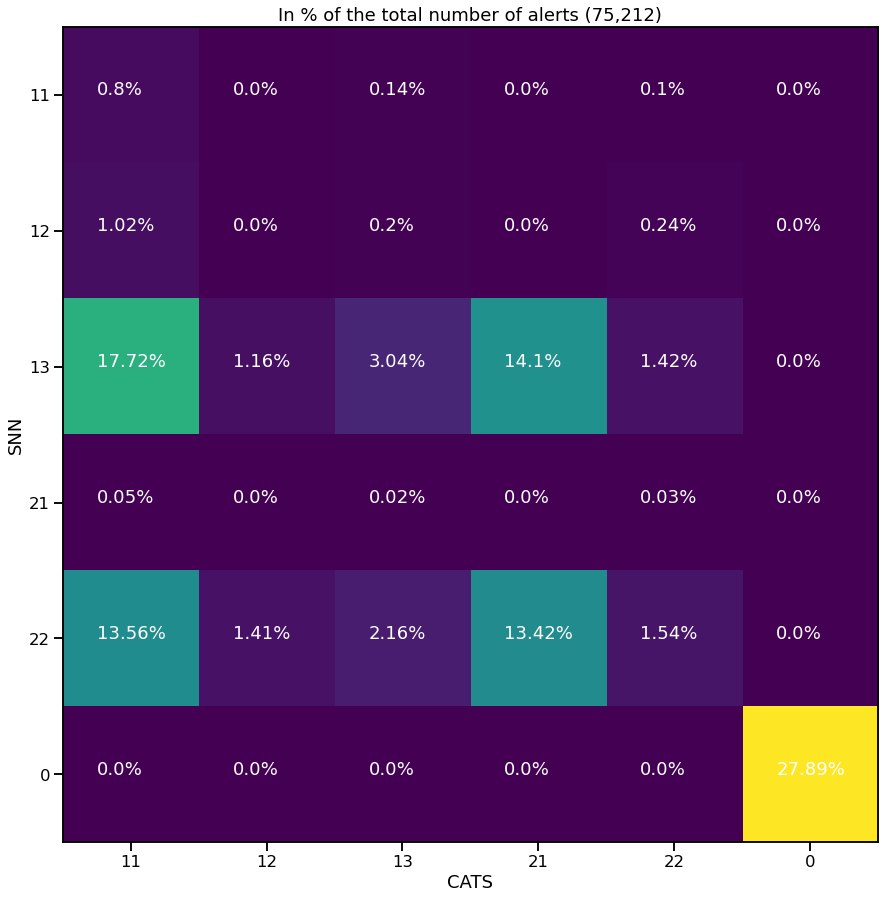

In [12]:
def plot_correlation_matrix(x, y, labels=[0, 1], xlabel='x', ylabel='y'):
    """
    """
    mat = metrics.confusion_matrix(x, y, labels=labels)
    
    fig = plt.figure(figsize=(15, 15))
    plt.imshow(mat)
    for l in range(len(mat)):
            for c in range(len(mat[0])):
                frac = np.round(mat[l, c]/len(x) * 100, 2)
                plt.text(c-0.25, l, '{}%'.format(frac), color='white')

    plt.xticks(range(len(mat)), labels)
    plt.yticks(range(len(mat)), labels)
    plt.xlabel(ylabel)
    plt.ylabel(xlabel)
    plt.title('In % of the total number of alerts ({:,})'.format(len(x)))
    plt.show()

plot_correlation_matrix(
    pdf['snn_broad_class'], 
    pdf['cats_broad_class'], 
    labels=[11, 12, 13, 21, 22, 0], 
    xlabel='SNN', 
    ylabel='CATS'
)

I do not understand this. I suggest SNN and CATS team to talk :D

### Broader level

In [13]:
f1 = pdf['rf_snia_vs_nonia'] > 0.5
f2 = pdf['snn_snia_vs_nonia'] > 0.5

f4 = pdf['cats_broad_class'] == 11

msg = """
Early x CATS(SN broad): {:,}
SNN x CATS(SN broad): {:,}
Early Ia x SNN Ia x CATS(SN broad): {:,}
""".format(
    len(pdf[f1 & f4]), len(pdf[f2 & f4]), len(pdf[f1 & f2 & f3])
)
print(msg)


Early x CATS(SN broad): 274
SNN x CATS(SN broad): 448
Early Ia x SNN Ia x CATS(SN broad): 0



Possible Ibc/II contamination for Ia:

In [14]:
f1 = pdf['rf_snia_vs_nonia'] > 0.5
f2 = pdf['snn_snia_vs_nonia'] > 0.5

f3 = pdf['cats_fine_class'] == 112
f4 = pdf['cats_fine_class'] == 113

msg = """
AL Ia x CATS(SN Ibc | SN II): {:,}
SNN Ia x CATS(SN Ibc | SN II): {:,}
AL Ia x SNN Ia x CATS(SN Ibc | SN II): {:,}
""".format(
    len(pdf[f1 & (f3 | f4)]), len(pdf[f2 & (f3 | f4)]), len(pdf[f1 & f2 & (f3 | f4)])
)
print(msg)


AL Ia x CATS(SN Ibc | SN II): 179
SNN Ia x CATS(SN Ibc | SN II): 386
AL Ia x SNN Ia x CATS(SN Ibc | SN II): 0



## Debugging your code

To debug your code, you can reconstruct the lightcurves from the alerts:

In [15]:
def extract_forced_history(data: dict, key: str) -> np.array:
    """ Aggregate current & historical data from an alert packet
    
    Parameters
    ----------
    data: dict
        One alert data as dictionary
    key: str
        The field to extract
        
    Returns:
    ----------
    out: np.array
    """
    current = [data['diaSource'][key]]
    history = [i[key] for i in data['prvDiaForcedSources']]

    return np.array(current + history)

In [16]:
def extract_lightcurve(data):
    try:
        # extract flux, and error estimates
        psFlux = extract_forced_history(data, 'psFlux')
        psFluxErr = extract_forced_history(data, 'psFluxErr')

        # extract times & bandpasses
        midPointTai = extract_forced_history(data, 'midPointTai')
        filterName = extract_forced_history(data, 'filterName')
    except TypeError:
        return None, None, None, None

    return psFlux, psFluxErr, midPointTai, filterName

def display_scores(data):
    msg = """
        Binary classifiers:
        - Early Ia: {:.2f}
        - SNN Ia: {:.2f}
        - AGN: {:.2f}

        Broad classifiers:
        - CATS: {}
        - SNN: {}

        Fine classifiers
        - CATS Ia: {}
        """.format(
            data['rf_snia_vs_nonia'],
            data['snn_snia_vs_nonia'],
            data['rf_agn_vs_nonagn'],
            data['cats_broad_class'],
            data['snn_broad_class'],
            data['cats_fine_class']
        )
    
    return msg

def plot_single_alert_lightcurve(psFlux, psFluxErr, midPointTai, filterName):
    fig = plt.figure(figsize=(12, 5))
    for fid in np.unique(filterName):
        mask = filterName == fid

        plt.errorbar(
            midPointTai[mask], 
            psFlux[mask], 
            psFluxErr[mask], 
            ls='', 
            marker='o', 
            label='{}'.format(fid)
        )
    plt.xlabel('JD')
    plt.ylabel('Flux')
    plt.legend()
    plt.show();

## Random alerts


        Binary classifiers:
        - Early Ia: 0.00
        - SNN Ia: 0.01
        - AGN: 0.00

        Broad classifiers:
        - CATS: 13
        - SNN: 13

        Fine classifiers
        - CATS Ia: 132
        


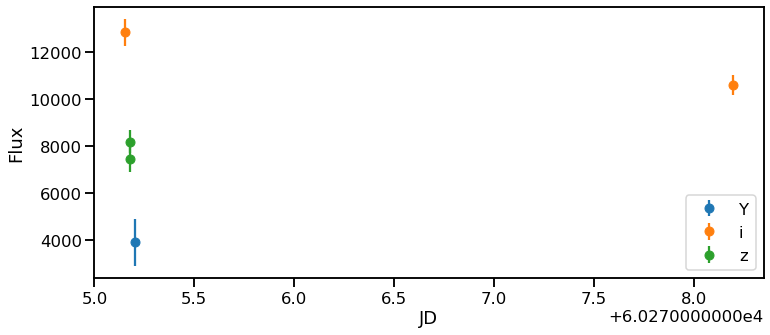


        Binary classifiers:
        - Early Ia: 0.00
        - SNN Ia: 0.00
        - AGN: 0.00

        Broad classifiers:
        - CATS: 11
        - SNN: 13

        Fine classifiers
        - CATS Ia: 111
        


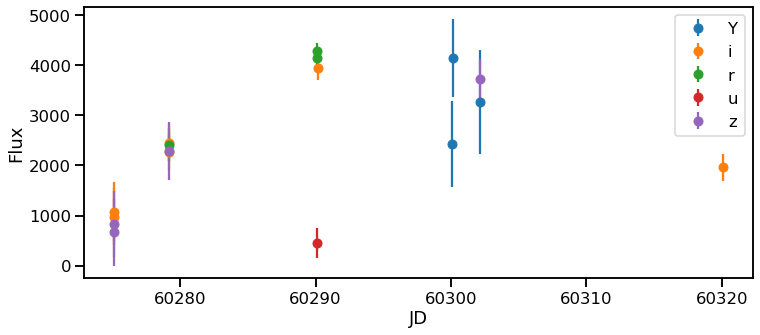


        Binary classifiers:
        - Early Ia: 0.00
        - SNN Ia: 0.00
        - AGN: 0.05

        Broad classifiers:
        - CATS: 11
        - SNN: 22

        Fine classifiers
        - CATS Ia: 112
        


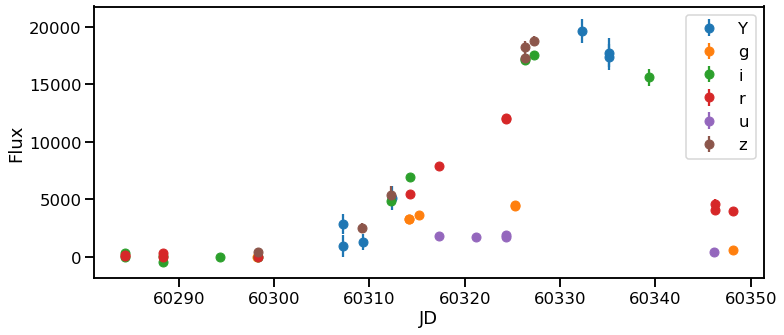


        Binary classifiers:
        - Early Ia: 0.00
        - SNN Ia: 0.00
        - AGN: 0.21

        Broad classifiers:
        - CATS: 21
        - SNN: 22

        Fine classifiers
        - CATS Ia: 214
        


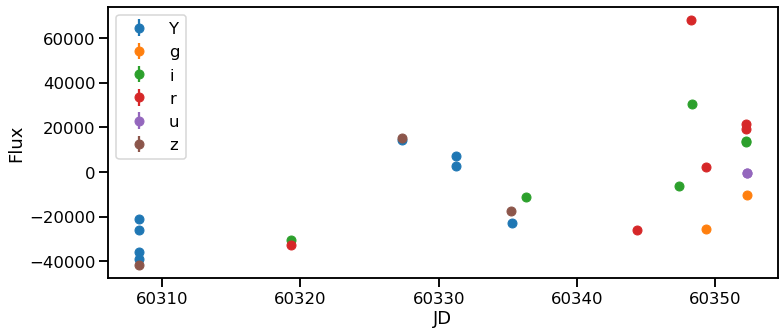


        Binary classifiers:
        - Early Ia: 0.00
        - SNN Ia: 0.00
        - AGN: 0.00

        Broad classifiers:
        - CATS: 11
        - SNN: 22

        Fine classifiers
        - CATS Ia: 112
        


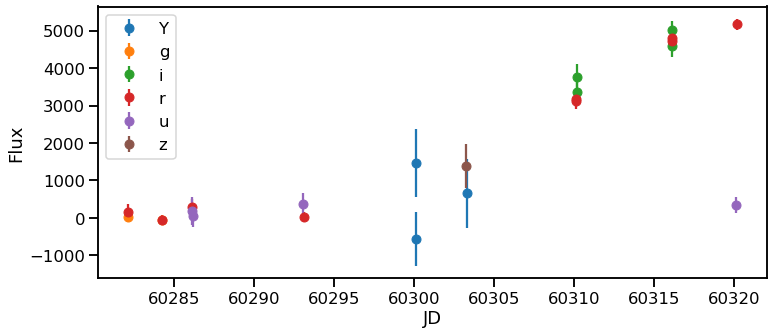


        Binary classifiers:
        - Early Ia: 0.00
        - SNN Ia: 0.00
        - AGN: 0.00

        Broad classifiers:
        - CATS: 21
        - SNN: 22

        Fine classifiers
        - CATS Ia: 214
        


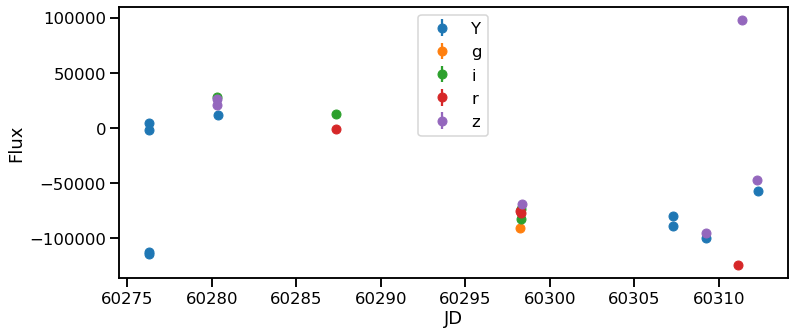


        Binary classifiers:
        - Early Ia: 0.00
        - SNN Ia: 0.00
        - AGN: 0.00

        Broad classifiers:
        - CATS: 21
        - SNN: 22

        Fine classifiers
        - CATS Ia: 214
        


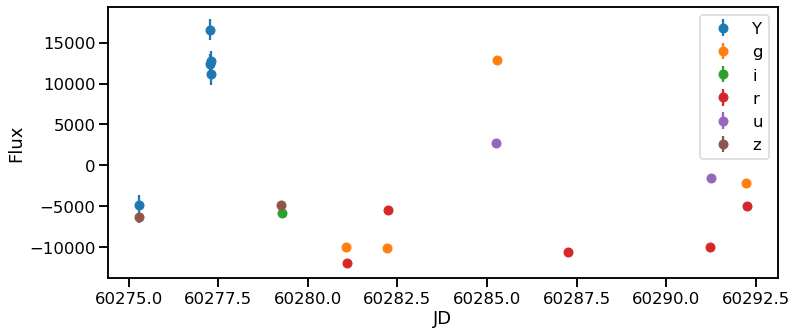

In [17]:
NALERT = 10
STATE = 1

some_alerts = pdf.sample(NALERT, random_state=STATE).to_dict('records')

for an_alert in some_alerts:
    psFlux, psFluxErr, midPointTai, filterName = extract_lightcurve(an_alert)
    
    if psFlux is None:
        # empty history
        continue
    
    msg = display_scores(an_alert)
    print(msg)
    
    plot_single_alert_lightcurve(psFlux, psFluxErr, midPointTai, filterName)

## Early SN Ia candidates


        Binary classifiers:
        - Early Ia: 0.67
        - SNN Ia: 0.00
        - AGN: 0.06

        Broad classifiers:
        - CATS: 11
        - SNN: 22

        Fine classifiers
        - CATS Ia: 113
        


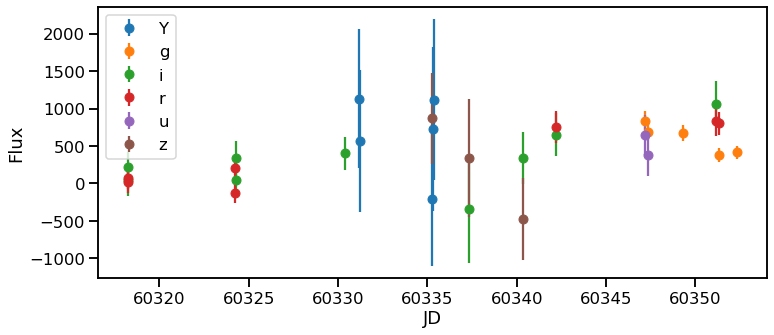


        Binary classifiers:
        - Early Ia: 0.57
        - SNN Ia: 0.00
        - AGN: 0.06

        Broad classifiers:
        - CATS: 11
        - SNN: 22

        Fine classifiers
        - CATS Ia: 111
        


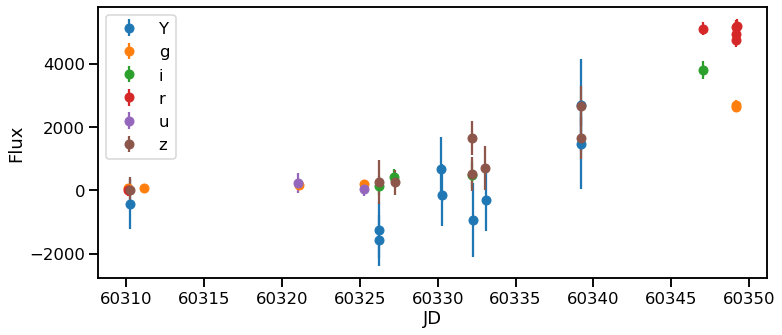


        Binary classifiers:
        - Early Ia: 0.54
        - SNN Ia: 0.00
        - AGN: 0.00

        Broad classifiers:
        - CATS: 11
        - SNN: 22

        Fine classifiers
        - CATS Ia: 112
        


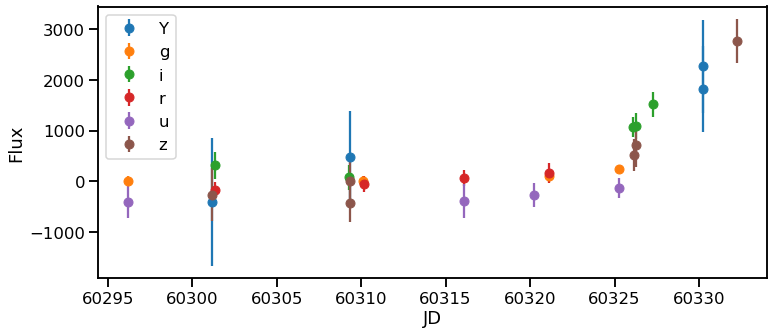


        Binary classifiers:
        - Early Ia: 0.54
        - SNN Ia: 0.00
        - AGN: 0.00

        Broad classifiers:
        - CATS: 11
        - SNN: 22

        Fine classifiers
        - CATS Ia: 112
        


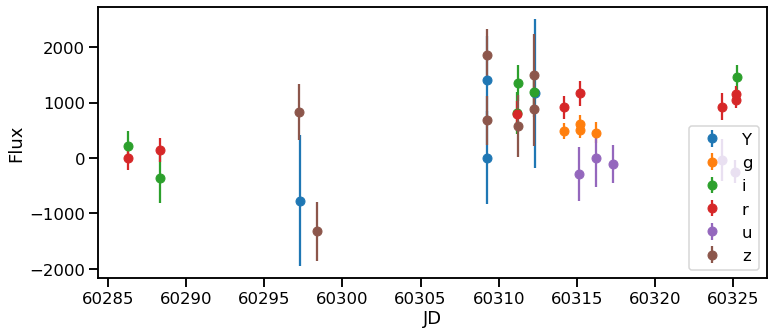


        Binary classifiers:
        - Early Ia: 0.55
        - SNN Ia: 0.00
        - AGN: 0.06

        Broad classifiers:
        - CATS: 11
        - SNN: 22

        Fine classifiers
        - CATS Ia: 112
        


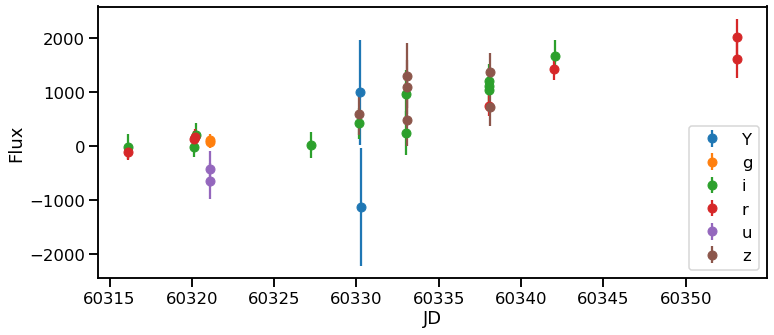


        Binary classifiers:
        - Early Ia: 0.60
        - SNN Ia: 0.00
        - AGN: 0.06

        Broad classifiers:
        - CATS: 11
        - SNN: 22

        Fine classifiers
        - CATS Ia: 113
        


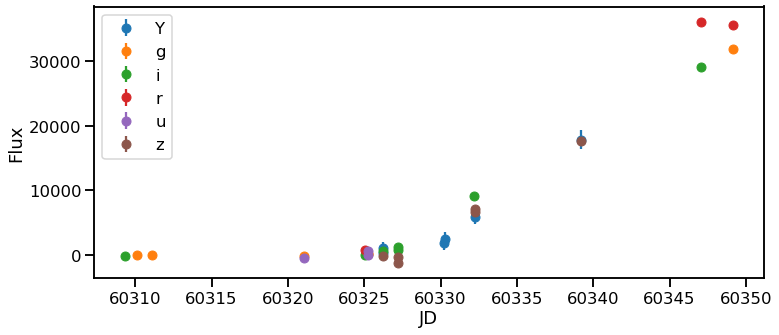


        Binary classifiers:
        - Early Ia: 0.54
        - SNN Ia: 0.00
        - AGN: 0.05

        Broad classifiers:
        - CATS: 11
        - SNN: 22

        Fine classifiers
        - CATS Ia: 113
        


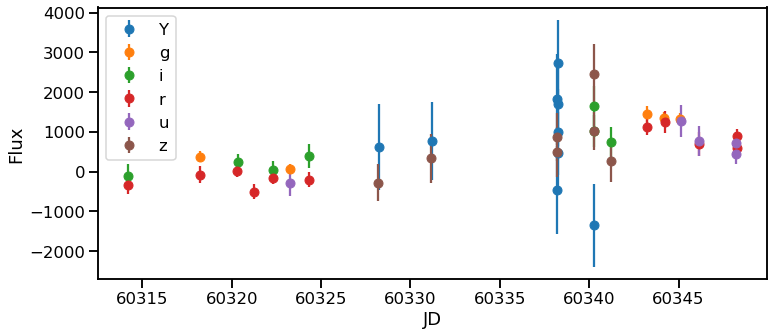


        Binary classifiers:
        - Early Ia: 0.51
        - SNN Ia: 0.00
        - AGN: 0.11

        Broad classifiers:
        - CATS: 11
        - SNN: 22

        Fine classifiers
        - CATS Ia: 111
        


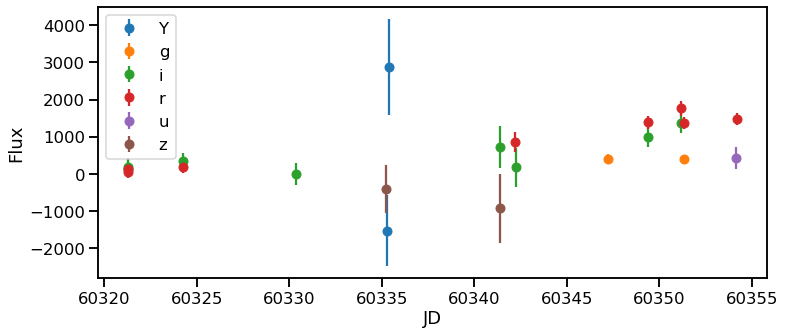


        Binary classifiers:
        - Early Ia: 0.75
        - SNN Ia: 0.00
        - AGN: 0.01

        Broad classifiers:
        - CATS: 11
        - SNN: 22

        Fine classifiers
        - CATS Ia: 111
        


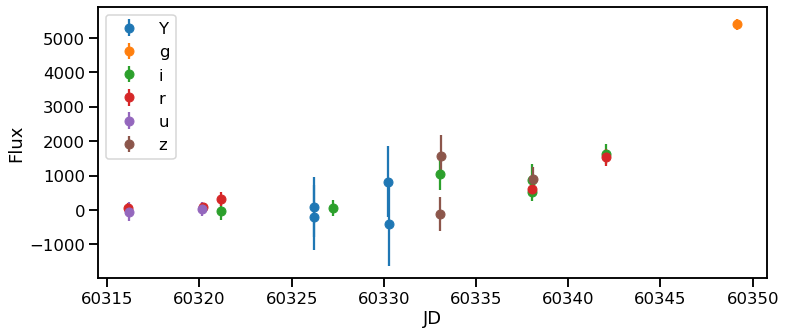


        Binary classifiers:
        - Early Ia: 0.51
        - SNN Ia: 0.00
        - AGN: 0.00

        Broad classifiers:
        - CATS: 11
        - SNN: 22

        Fine classifiers
        - CATS Ia: 112
        


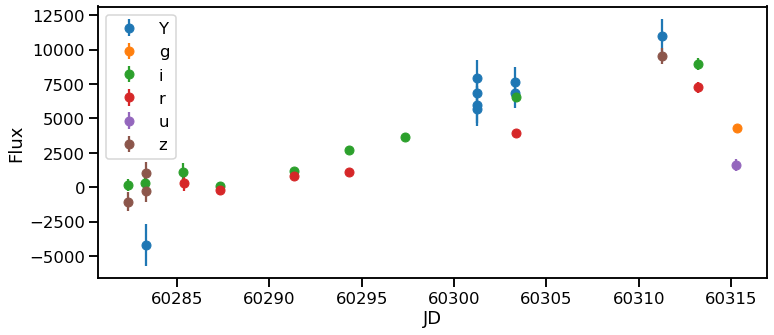

In [18]:
f1 = pdf['rf_snia_vs_nonia'] > 0.5
some_alerts = pdf[f1].sample(NALERT, random_state=STATE).to_dict('records')[0:NALERT]

for an_alert in some_alerts:
    psFlux, psFluxErr, midPointTai, filterName = extract_lightcurve(an_alert)
    
    if psFlux is None:
        # empty history
        continue
    
    msg = display_scores(an_alert)
    print(msg)
    
    plot_single_alert_lightcurve(psFlux, psFluxErr, midPointTai, filterName)

## SNN Ia candidates


        Binary classifiers:
        - Early Ia: 0.00
        - SNN Ia: 0.71
        - AGN: 0.12

        Broad classifiers:
        - CATS: 11
        - SNN: 11

        Fine classifiers
        - CATS Ia: 113
        


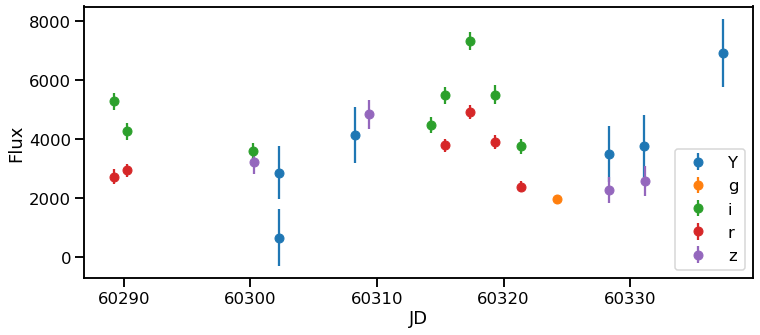


        Binary classifiers:
        - Early Ia: 0.00
        - SNN Ia: 0.66
        - AGN: 0.00

        Broad classifiers:
        - CATS: 11
        - SNN: 12

        Fine classifiers
        - CATS Ia: 113
        


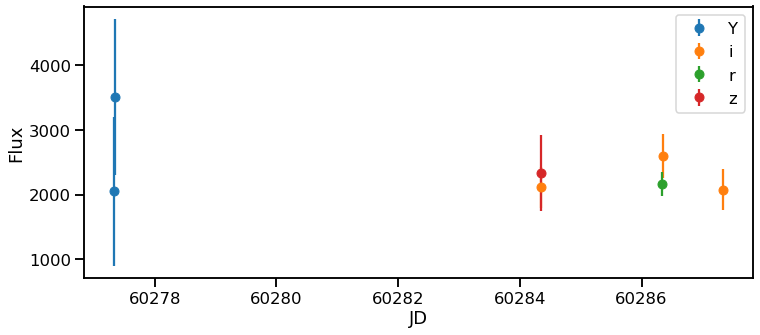


        Binary classifiers:
        - Early Ia: 0.00
        - SNN Ia: 0.99
        - AGN: 0.00

        Broad classifiers:
        - CATS: 11
        - SNN: 11

        Fine classifiers
        - CATS Ia: 113
        


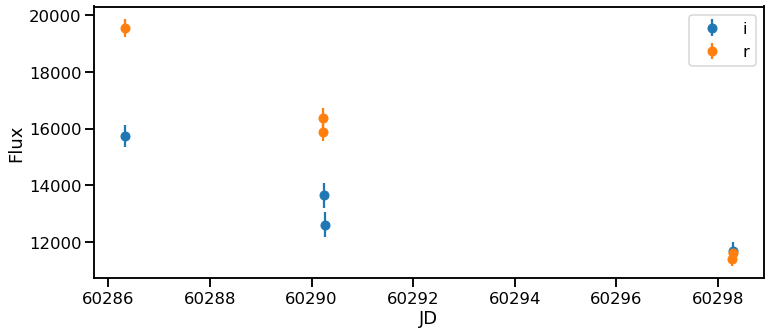


        Binary classifiers:
        - Early Ia: 0.00
        - SNN Ia: 1.00
        - AGN: 0.00

        Broad classifiers:
        - CATS: 22
        - SNN: 11

        Fine classifiers
        - CATS Ia: 221
        


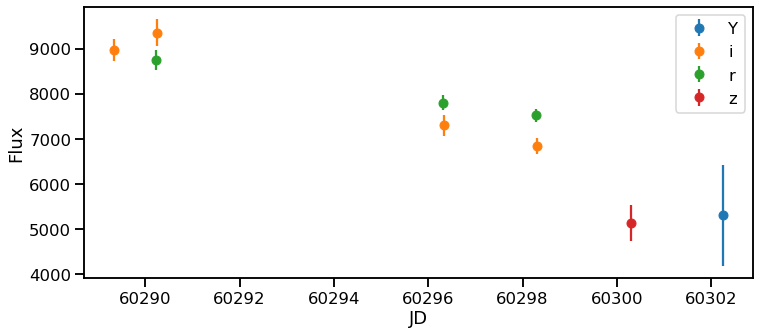


        Binary classifiers:
        - Early Ia: 0.00
        - SNN Ia: 0.75
        - AGN: 0.00

        Broad classifiers:
        - CATS: 11
        - SNN: 11

        Fine classifiers
        - CATS Ia: 112
        


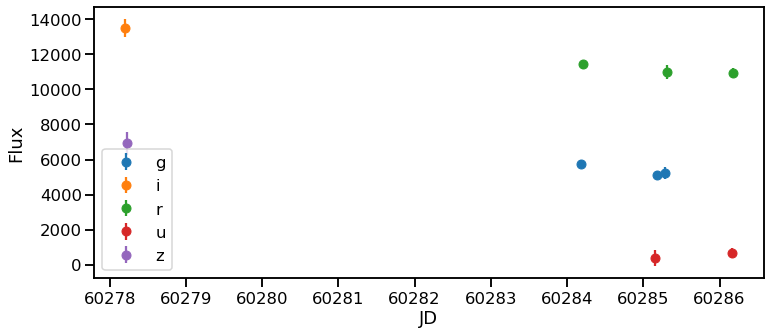


        Binary classifiers:
        - Early Ia: 0.00
        - SNN Ia: 0.93
        - AGN: 0.00

        Broad classifiers:
        - CATS: 11
        - SNN: 11

        Fine classifiers
        - CATS Ia: 113
        


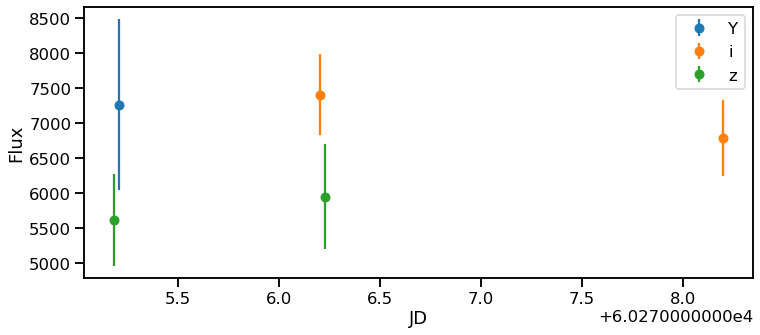


        Binary classifiers:
        - Early Ia: 0.00
        - SNN Ia: 0.54
        - AGN: 0.00

        Broad classifiers:
        - CATS: 11
        - SNN: 13

        Fine classifiers
        - CATS Ia: 113
        


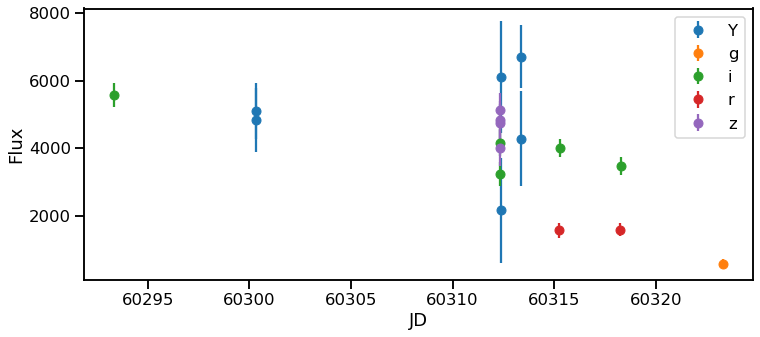


        Binary classifiers:
        - Early Ia: 0.00
        - SNN Ia: 0.93
        - AGN: 0.00

        Broad classifiers:
        - CATS: 11
        - SNN: 11

        Fine classifiers
        - CATS Ia: 113
        


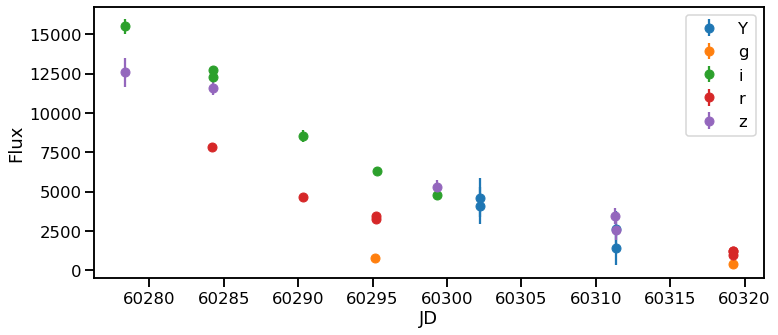


        Binary classifiers:
        - Early Ia: 0.00
        - SNN Ia: 0.51
        - AGN: 0.00

        Broad classifiers:
        - CATS: 22
        - SNN: 12

        Fine classifiers
        - CATS Ia: 221
        


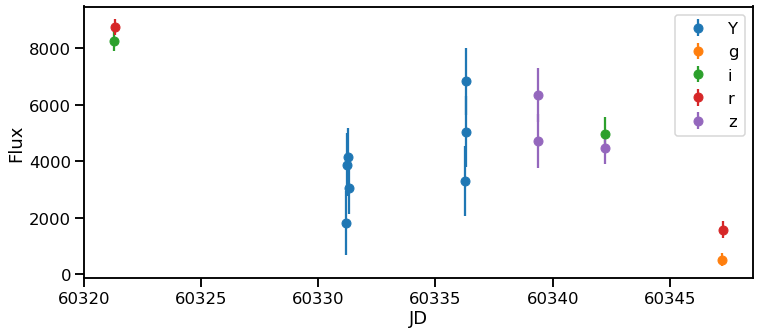


        Binary classifiers:
        - Early Ia: 0.00
        - SNN Ia: 0.74
        - AGN: 0.00

        Broad classifiers:
        - CATS: 11
        - SNN: 13

        Fine classifiers
        - CATS Ia: 113
        


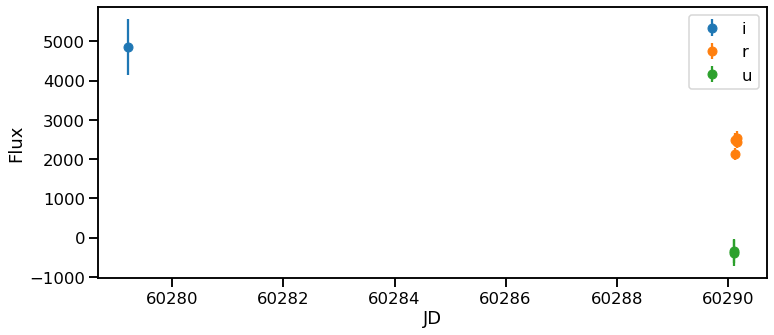

In [19]:
f1 = pdf['snn_snia_vs_nonia'] > 0.5
some_alerts = pdf[f1].sample(NALERT, random_state=STATE).to_dict('records')[0:NALERT]

for an_alert in some_alerts:
    psFlux, psFluxErr, midPointTai, filterName = extract_lightcurve(an_alert)
    
    if psFlux is None:
        # empty history
        continue
    
    msg = display_scores(an_alert)
    print(msg)
    
    plot_single_alert_lightcurve(psFlux, psFluxErr, midPointTai, filterName)

## AGN candidates


        Binary classifiers:
        - Early Ia: 0.00
        - SNN Ia: 0.00
        - AGN: 0.58

        Broad classifiers:
        - CATS: 11
        - SNN: 22

        Fine classifiers
        - CATS Ia: 113
        


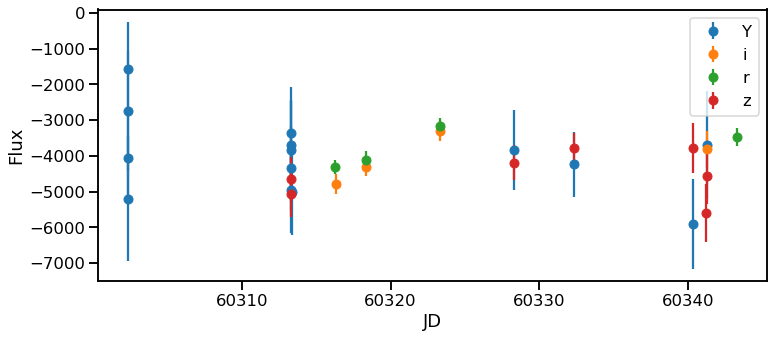


        Binary classifiers:
        - Early Ia: 0.00
        - SNN Ia: 0.00
        - AGN: 0.53

        Broad classifiers:
        - CATS: 22
        - SNN: 22

        Fine classifiers
        - CATS Ia: 221
        


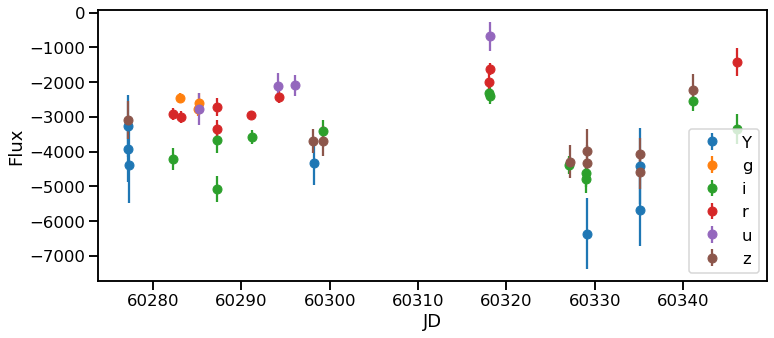


        Binary classifiers:
        - Early Ia: 0.00
        - SNN Ia: 0.00
        - AGN: 0.54

        Broad classifiers:
        - CATS: 22
        - SNN: 22

        Fine classifiers
        - CATS Ia: 221
        


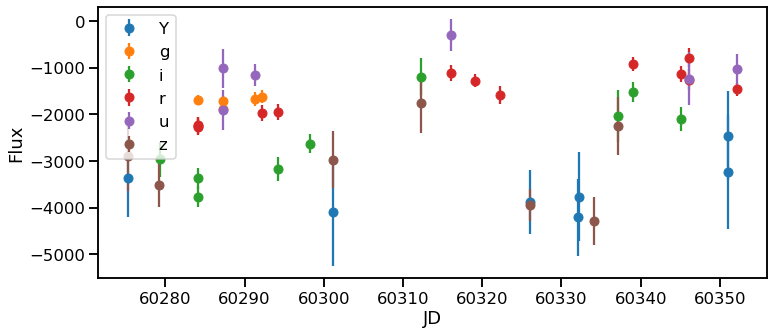


        Binary classifiers:
        - Early Ia: 0.00
        - SNN Ia: 0.00
        - AGN: 0.53

        Broad classifiers:
        - CATS: 22
        - SNN: 22

        Fine classifiers
        - CATS Ia: 221
        


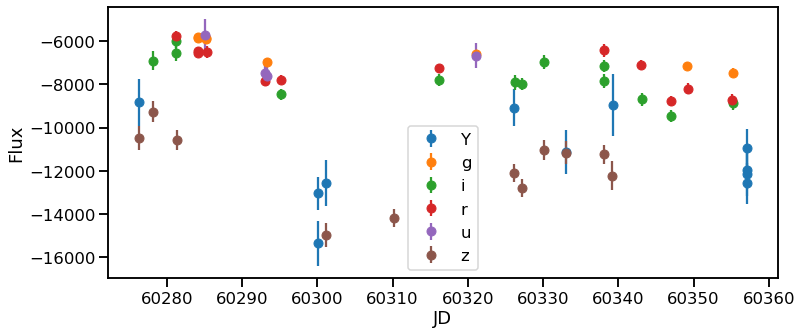


        Binary classifiers:
        - Early Ia: 0.00
        - SNN Ia: 0.00
        - AGN: 0.54

        Broad classifiers:
        - CATS: 22
        - SNN: 22

        Fine classifiers
        - CATS Ia: 221
        


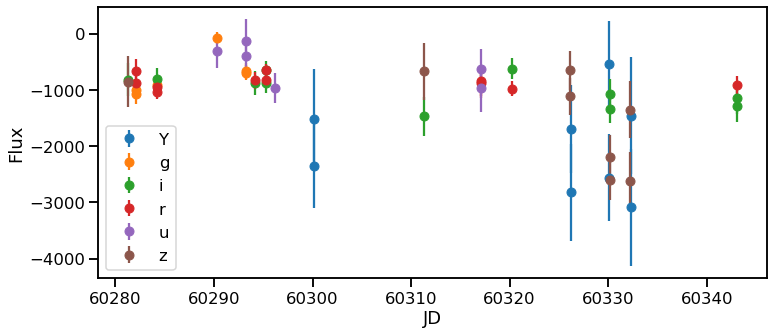


        Binary classifiers:
        - Early Ia: 0.00
        - SNN Ia: 0.00
        - AGN: 0.52

        Broad classifiers:
        - CATS: 11
        - SNN: 22

        Fine classifiers
        - CATS Ia: 113
        


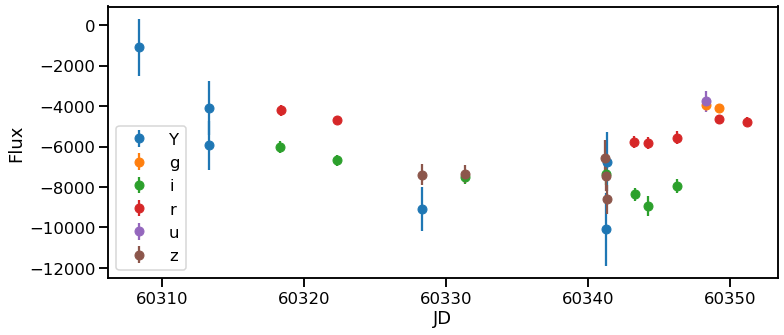


        Binary classifiers:
        - Early Ia: 0.00
        - SNN Ia: 0.00
        - AGN: 0.58

        Broad classifiers:
        - CATS: 22
        - SNN: 22

        Fine classifiers
        - CATS Ia: 221
        


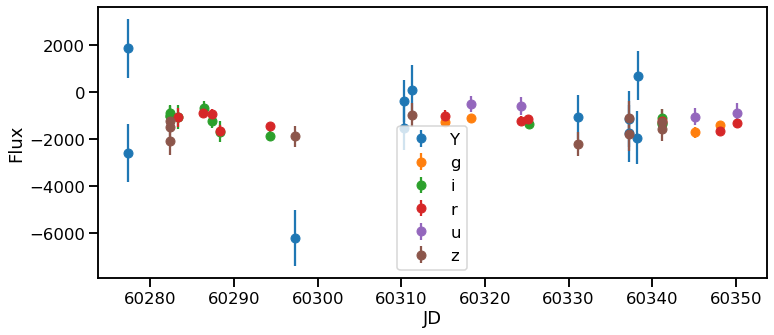


        Binary classifiers:
        - Early Ia: 0.00
        - SNN Ia: 0.00
        - AGN: 0.53

        Broad classifiers:
        - CATS: 22
        - SNN: 22

        Fine classifiers
        - CATS Ia: 221
        


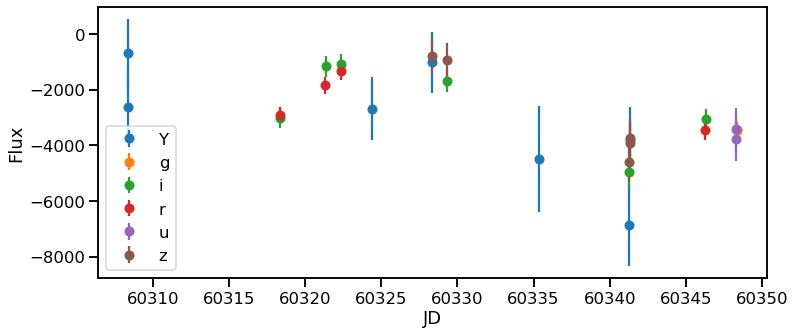


        Binary classifiers:
        - Early Ia: 0.00
        - SNN Ia: 0.00
        - AGN: 0.54

        Broad classifiers:
        - CATS: 22
        - SNN: 22

        Fine classifiers
        - CATS Ia: 221
        


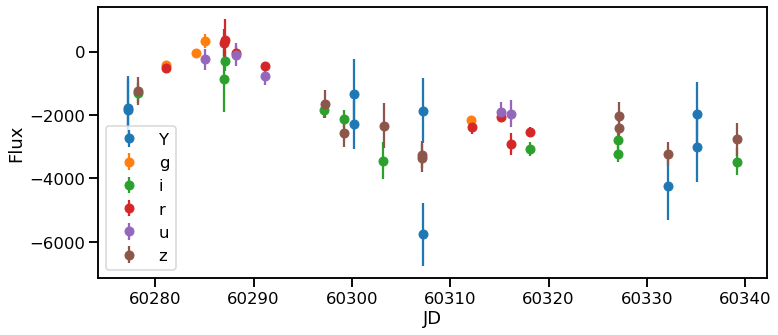


        Binary classifiers:
        - Early Ia: 0.00
        - SNN Ia: 0.00
        - AGN: 0.51

        Broad classifiers:
        - CATS: 11
        - SNN: 22

        Fine classifiers
        - CATS Ia: 113
        


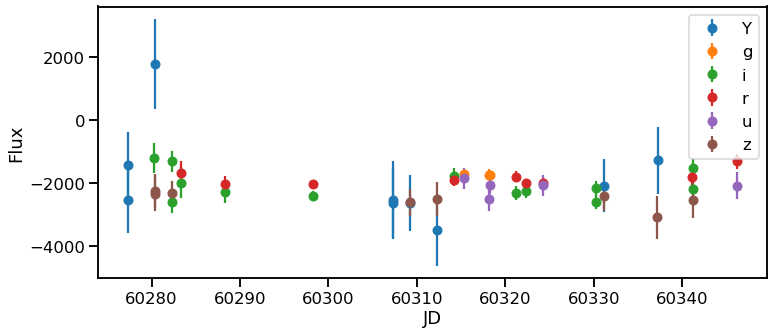

In [20]:
f1 = pdf['rf_agn_vs_nonagn'] > 0.5
some_alerts = pdf[f1].sample(NALERT, random_state=STATE).to_dict('records')[0:NALERT]

for an_alert in some_alerts:
    psFlux, psFluxErr, midPointTai, filterName = extract_lightcurve(an_alert)
    
    if psFlux is None:
        # empty history
        continue
    
    msg = display_scores(an_alert)
    print(msg)
    
    plot_single_alert_lightcurve(psFlux, psFluxErr, midPointTai, filterName)